In [1]:
import erode

This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

In [2]:
e = erode.ErodeInstance("ap-1_else-0_wt.bnet")

In [3]:
print(e)

ap-1_else-0_wt.bnet: 10 species.
Species:
[Ap, Ap2, Dl, Dl2, Fng, Fng2, N, N2, Ser, Ser2]
	Ap:	true
	Ap2:	false
	Dl:	(!Ap&N)
	Dl2:	(!Ap2&N2)
	Fng:	Ap
	Fng2:	Ap2
	N:	((!Fng&Ser2) | (Fng&Dl2))
	N2:	((!Dl&!Fng2) | (Dl&Ser))
	Ser:	Ap
	Ser2:	Ap2


In [4]:
e.partition

{'Ap': 1,
 'Ap2': 1,
 'Dl': 1,
 'Dl2': 1,
 'Fng': 1,
 'Fng2': 1,
 'N': 1,
 'N2': 1,
 'Ser': 1,
 'Ser2': 1}

In [5]:
print(e.partition)

The partition has 1 block out of 10 species:
Block 1, Size: 10
0-Ap 
1-Ap2 
2-Dl 
3-Dl2 
4-Fng 
5-Fng2 
6-N 
7-N2 
8-Ser 
9-Ser2 




In [6]:
bbe = e.bbe_partition()
bbe

{'Ap': 1,
 'Ap2': 2,
 'Dl': 3,
 'Dl2': 4,
 'Fng': 5,
 'Fng2': 6,
 'N': 7,
 'N2': 8,
 'Ser': 5,
 'Ser2': 6}

In [7]:
print(bbe)

The partition has 8 blocks out of 10 species:
Block 1, Size: 1
0-Ap 

Block 2, Size: 1
1-Ap2 

Block 3, Size: 1
2-Dl 

Block 4, Size: 1
3-Dl2 

Block 5, Size: 2
4-Fng 
8-Ser 

Block 6, Size: 2
5-Fng2 
9-Ser2 

Block 7, Size: 1
6-N 

Block 8, Size: 1
7-N2 




In [8]:
e.reduce_model()

Ap <- 1
Ap2 <- 0
Dl <- !Ap&N
Dl2 <- !Ap2&N2
Fng <- Ap
Fng2 <- Ap2
N <- (!Fng&Fng2)|(Fng&Dl2)
N2 <- (!Dl&!Fng2)|(Dl&Fng)

In [9]:
print(e)

ap-1_else-0_wt.bnetBBE: 8 species.
Species:
[Ap, Ap2, Dl, Dl2, Fng, Fng2, N, N2]
	Ap:	true
	Ap2:	false
	Dl:	(!Ap&N)
	Dl2:	(!Ap2&N2)
	Fng:	Ap
	Fng2:	Ap2
	N:	((!Fng&Fng2) | (Fng&Dl2))
	N2:	((!Dl&!Fng2) | (Dl&Fng))


In [10]:
e.species

['Ap', 'Ap2', 'Dl', 'Dl2', 'Fng', 'Fng2', 'N', 'N2']

In [11]:
e.partition

{'Ap': 1, 'Ap2': 2, 'Dl': 3, 'Dl2': 4, 'Fng': 5, 'Fng2': 6, 'N': 7, 'N2': 8}

In [12]:
e.reduce_model(output_bnet="/tmp/test.bnet")

In [13]:
%cat /tmp/test.bnet

# model in BoolNet format
# the header targets, factors is mandatory to be importable in the R package BoolNet

targets, factors
Ap, true
Ap2, false
Dl, (!Ap&N)
Dl2, (!Ap2&N2)
Fng, Ap
Fng2, Ap2
N, ((!Fng&Fng2) | (Fng&Dl2))
N2, ((!Dl&!Fng2) | (Dl&Fng))


In [14]:
e.get_initial_partition()

{'Ap': 1, 'Ap2': 1, 'Dl': 1, 'Dl2': 1, 'Fng': 1, 'Fng2': 1, 'N': 1, 'N2': 1}

In [15]:
erode.bbe_reduction("ap-1_else-0_wt.bnet", "ap-1_else-0_wt_BBE.bnet")
%cat ap-1_else-0_wt_BBE.bnet

# model in BoolNet format
# the header targets, factors is mandatory to be importable in the R package BoolNet

targets, factors
Ap, true
Ap2, false
Dl, (!Ap&N)
Dl2, (!Ap2&N2)
Fng, Ap
Fng2, Ap2
N, ((!Fng&Fng2) | (Fng&Dl2))
N2, ((!Dl&!Fng2) | (Dl&Fng))


In [16]:
f = {
    "Ap": 1,
    "Ap2": 0,
    "Dl": "(!Ap&N)",
    "Dl2": "(!Ap2&N2)",
    "Fng": "Ap",
    "Fng2": "Ap2",
    "N": "((!Fng&Ser2) | (Fng&Dl2))",
    "N2": "((!Dl&!Fng2) | (Dl&Ser))",
    "Ser": "Ap",
    "Ser2": "Ap2",
}
f, len(f)

({'Ap': 1,
  'Ap2': 0,
  'Dl': '(!Ap&N)',
  'Dl2': '(!Ap2&N2)',
  'Fng': 'Ap',
  'Fng2': 'Ap2',
  'N': '((!Fng&Ser2) | (Fng&Dl2))',
  'N2': '((!Dl&!Fng2) | (Dl&Ser))',
  'Ser': 'Ap',
  'Ser2': 'Ap2'},
 10)

In [17]:
f_red = erode.bbe_reduction(f)
f_red, len(f_red)

(Ap <- 1
 Ap2 <- 0
 Dl <- !Ap&N
 Dl2 <- !Ap2&N2
 Fng <- Ap
 Fng2 <- Ap2
 N <- (!Fng&Fng2)|(Fng&Dl2)
 N2 <- (!Dl&!Fng2)|(Dl&Fng),
 8)

In [18]:
lqm = f_red.to_biolqm()

In [19]:
import biolqm

In [20]:
from colomoto_jupyter import tabulate

In [21]:
tabulate(biolqm.fixpoints(lqm))

,Ap,Ap2,Dl,Dl2,Fng,Fng2,N,N2
0,1,0,0,1,1,0,1,1


In [22]:
import bns

In [23]:
bns.fixpoints(lqm)

[{'Ap': 1, 'Ap2': 0, 'Dl': 0, 'Dl2': 1, 'Fng': 1, 'Fng2': 0, 'N': 1, 'N2': 1}]

In [24]:
import ginsim

In [25]:
tcr40_ginsim = ginsim.load("http://ginsim.org/sites/default/files/TCRsig40.zginml")
ginsim.show(tcr40_ginsim)

/notebook/TCRsig40.zginml

In [26]:
%time tabulate(bns.attractors(tcr40_ginsim))

CPU times: user 484 ms, sys: 35.5 ms, total: 519 ms
Wall time: 549 ms


In [27]:
tcr40_red = erode.bbe_reduction(tcr40_ginsim)

In [28]:
len(tcr40_red)

28

# computing graph layout...


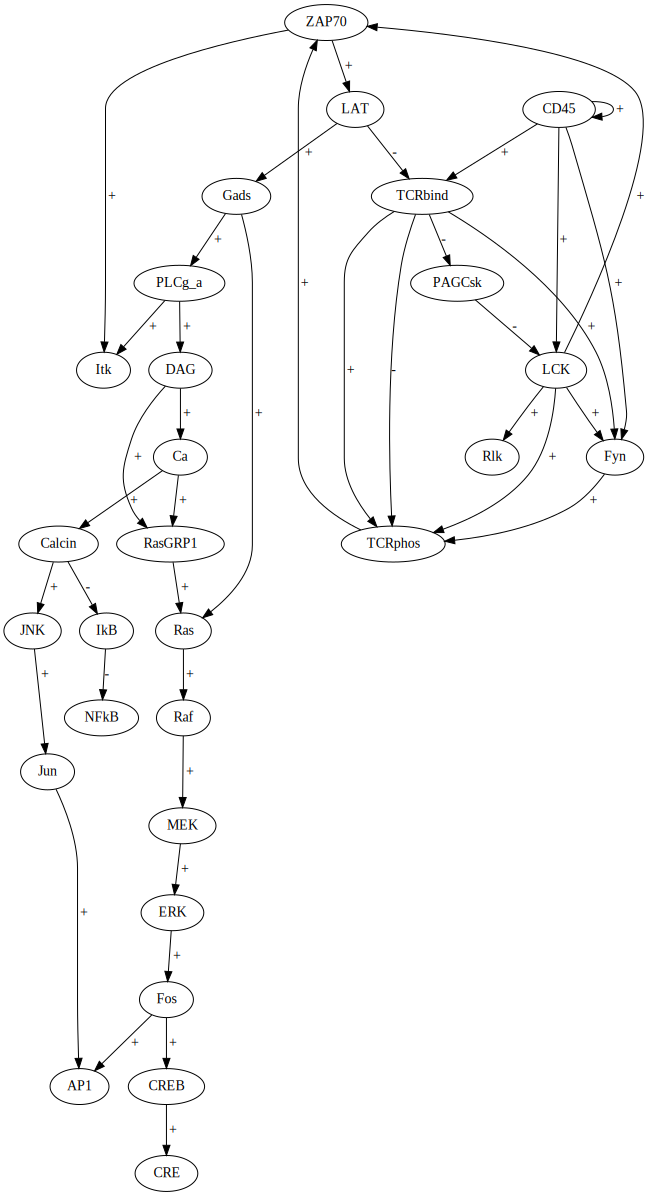

In [29]:
tcr40_red.influence_graph()

In [30]:
tcrred_lqm = tcr40_red.to_biolqm()
tabulate(bns.attractors(tcrred_lqm))